## Langgraph initial flow

In [1]:
from typing_extensions import TypedDict
from typing import Literal

from langgraph.graph import StateGraph, START, END

In [2]:
#Utility Functions
class TypedDictState(TypedDict):
    state:str
    email : str
    classification : Literal["job_status", "online_meet", "other"]
    job_details : dict
    tracker_update : Literal["Successful", "Failed"]
    meet_request_details :  dict
    meet_details : dict
    meet_link_sent : Literal["Successful", "Failed"]

In [3]:
def classify_email(state:TypedDictState):
    print("Get the email")

    return {"email":state["email"]}

def perform_email_classification(state:TypedDictState)->Literal["job_status", "online_meet", "other"]:
    print("This function reads the email and classifies it")
    
    if(state['email'] == "job"):
        return "job_status"
        
    elif(state['email'] == 'meet'):
        return "online_meet"

    else:
        return "other"


def job_status(state:TypedDictState):
    print("Job status flow")
    return {"state":"Job status tracker flow triggered", "classification":"job_status"}

def online_meet(state:TypedDictState):
    print("Online Meet flow")
    return {"state":"Online meet request flow triggered", "classification":"online_meet"}

def other(state:TypedDictState):
    print("Other flow")
    return {"state":"Other flow triggered", "classification":"other"}

In [4]:
def identify_job_details(state:TypedDictState):
    print("This function reads the email to extract job title, company name and job status")

    return {"job_details" : {"title":"Data Scientist", "company":"Google", "status":"applied"}, "state":"Job details extracted"}


def update_tracker(state:TypedDictState):
    print("This function updated the tracker with extracted job details")

    return {"tracker_update" : "Successful", "state": "Tracker update successful"}

In [5]:
def identify_meet_timings(state:TypedDictState):
    print("This function reads the email to extract online meet requested date, time, duration")

    return {"meet_request_details" : {"requested_by":"johndoe@gmail.com", "date":"2025-07-13", "time":"9:00", "duration":"00:30"}, "state":"meeting request details extracted"}


def create_meet(state:TypedDictState):
    print("This function is to create online meet based on identified details")

    return {"meet_details" : {"meet_link":"abcd link"}, "state":"meet link created"}


def send_meet_link(state:TypedDictState):
    print("This function is to draft and send email including meet link")

    return {"meet_link_sent":"Successful", "state":"meet link sent"}

In [6]:
def others(state:TypedDictState):
    print("This function is to handle other type of mails")

In [7]:
#Build the LangGraph
graph_builder = StateGraph(TypedDictState)


#Graph Nodes

graph_builder.add_node("classify_email", classify_email)
graph_builder.add_node("job_status", job_status)
graph_builder.add_node("online_meet", online_meet)
graph_builder.add_node("other", other)

graph_builder.add_node("identify_job_details", identify_job_details)
graph_builder.add_node("update_tracker", update_tracker)

graph_builder.add_node("identify_meet_timings", identify_meet_timings)
graph_builder.add_node("create_meet", create_meet)
graph_builder.add_node("send_meet_link", send_meet_link)

graph_builder.add_node("others", others)


#Graph Edges
graph_builder.add_edge(START, "classify_email")
graph_builder.add_conditional_edges("classify_email",perform_email_classification)
graph_builder.add_edge("job_status", "identify_job_details")
graph_builder.add_edge("online_meet", "identify_meet_timings")
graph_builder.add_edge("other", "others")

graph_builder.add_edge("identify_job_details", "update_tracker")
graph_builder.add_edge("update_tracker", END)

graph_builder.add_edge("identify_meet_timings", "create_meet")
graph_builder.add_edge("create_meet", "send_meet_link")
graph_builder.add_edge("send_meet_link", END)

graph_builder.add_edge("others", END)

In [8]:
graph = graph_builder.compile()

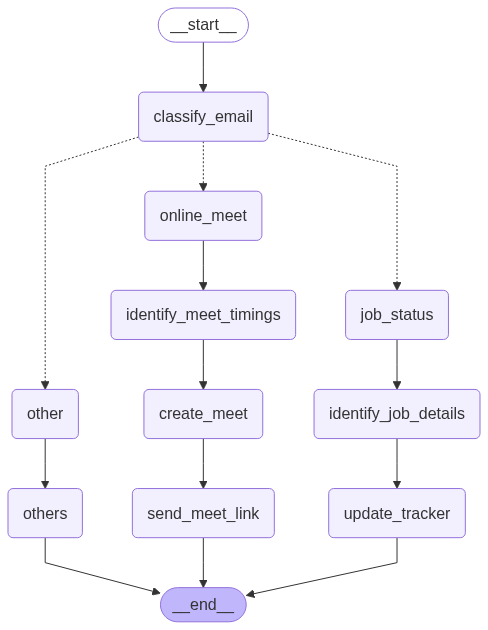

In [9]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    print("gone")
    pass

In [10]:
graph.invoke({"email":"job"})

Get the email
This function reads the email and classifies it
Job status flow
This function reads the email to extract job title, company name and job status
This function updated the tracker with extracted job details


{'state': 'Tracker update successful',
 'email': 'job',
 'classification': 'job_status',
 'job_details': {'title': 'Data Scientist',
  'company': 'Google',
  'status': 'applied'},
 'tracker_update': 'Successful'}

In [11]:
graph.invoke({"email":"meet"})

Get the email
This function reads the email and classifies it
Online Meet flow
This function reads the email to extract online meet requested date, time, duration
This function is to create online meet based on identified details
This function is to draft and send email including meet link


{'state': 'meet link sent',
 'email': 'meet',
 'classification': 'online_meet',
 'meet_request_details': {'requested_by': 'johndoe@gmail.com',
  'date': '2025-07-13',
  'time': '9:00',
  'duration': '00:30'},
 'meet_details': {'meet_link': 'abcd link'},
 'meet_link_sent': 'Successful'}

In [12]:
graph.invoke({"email":"other"})

Get the email
This function reads the email and classifies it
Other flow
This function is to handle other type of mails


{'state': 'Other flow triggered', 'email': 'other', 'classification': 'other'}